In [20]:
import numpy as np 
import pandas as pd
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.preprocessing import normalize
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin,erosion,dilation
import pickle
from commonfunctions import *

In [21]:
image_size = 28 # width and length
classes_n = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/"
train_data = np.loadtxt(data_path + "train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "test.csv", 
                       delimiter=",") 
test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [85]:
Xtrain = train_data[:,1:]
Xtest = test_data[:,1:]
Ytrain = np.asfarray(train_data[:, :1])
Ytest = np.asfarray(test_data[:, :1])
label_encoding = np.arange(10)
Ytrain_oh = (label_encoding == Ytrain).astype(np.int)
Ytest_oh = (label_encoding == Ytest).astype(np.int)


In [86]:
# pickle data SAVEING CODE
with open("data/pickled_mnist.pkl", "bw") as fh:
    data = (Xtrain, 
            Xtest, 
            Ytrain,
            Ytest,
            Ytrain_oh,
            Ytest_oh)
    pickle.dump(data, fh)

In [ ]:
# LOADING CODE
with open("data/pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)

Xtrain = data[0]
Xtest = data[1]
Ytrain = data[2]
Ytest = data[3]
Ytrain_oh = data[4]
Ytest_oh = data[5]


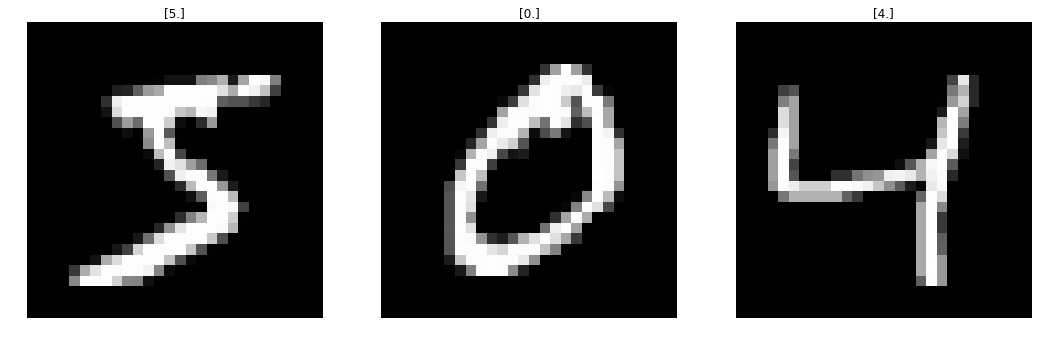

In [26]:
imgs = []
labels = []
for i in range(3):
    img = Xtrain[i].reshape((28,28))
    labels.append(str(Ytrain[i]))
    imgs.append(img)
show_images(imgs,labels)


In [79]:
model = Sequential()
model.add(Dense(100, input_dim=288, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


W1215 22:18:03.710193  7000 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1215 22:18:07.877116  7000 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1215 22:18:09.208437  7000 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1215 22:18:10.576401  7000 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1215 22:18:10.914674  7000 deprecation.py:506

In [77]:
def hog_features(X, imgshape=(28, 28), pixels_per_cell=(6, 6)):
    features = []
    for row in X:
        img = row.reshape(imgshape)
        img_feature = hog(img, orientations=8, pixels_per_cell=pixels_per_cell, cells_per_block=(2, 2))
        features.append(img_feature)
    return np.array(features)

In [ ]:
hog_features(Xtrain[1,:].reshape(1,-1))

In [87]:
Xtrain_hog = hog_features(Xtrain)
Xtest_hog = hog_features(Xtest)

X_train_norm = normalize(Xtrain_hog)
X_test_norm = normalize(Xtest_hog)
history = model.fit(X_train_norm, Ytrain_oh,
          batch_size=128, epochs=20,
          verbose=2)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


Epoch 1/20
 - 8s - loss: 0.0368 - acc: 0.9883
Epoch 2/20
 - 3s - loss: 0.0371 - acc: 0.9882
Epoch 3/20
 - 2s - loss: 0.0356 - acc: 0.9889
Epoch 4/20
 - 2s - loss: 0.0343 - acc: 0.9888
Epoch 5/20
 - 2s - loss: 0.0321 - acc: 0.9895
Epoch 6/20
 - 2s - loss: 0.0333 - acc: 0.9891
Epoch 7/20
 - 3s - loss: 0.0299 - acc: 0.9900
Epoch 8/20
 - 2s - loss: 0.0297 - acc: 0.9895
Epoch 9/20
 - 2s - loss: 0.0297 - acc: 0.9901
Epoch 10/20
 - 2s - loss: 0.0290 - acc: 0.9903
Epoch 11/20
 - 2s - loss: 0.0289 - acc: 0.9904
Epoch 12/20
 - 3s - loss: 0.0258 - acc: 0.9919
Epoch 13/20
 - 2s - loss: 0.0264 - acc: 0.9911
Epoch 14/20
 - 2s - loss: 0.0253 - acc: 0.9916
Epoch 15/20
 - 2s - loss: 0.0252 - acc: 0.9914
Epoch 16/20
 - 2s - loss: 0.0247 - acc: 0.9918
Epoch 17/20
 - 2s - loss: 0.0249 - acc: 0.9914
Epoch 18/20
 - 2s - loss: 0.0241 - acc: 0.9918
Epoch 19/20
 - 2s - loss: 0.0249 - acc: 0.9915
Epoch 20/20
 - 2s - loss: 0.0234 - acc: 0.9920


In [89]:
model.evaluate(X_test_norm,Ytest_oh)

10000/10000 [==============================] - 4s 423us/step


[0.05718538095489348, 0.9844]

In [94]:
# saving the model
model_name = 'hogmodel.h5'
model.save(model_name)
print('Saved trained model as %s ' % model_name)


Saved trained model as hogmodel.h5 


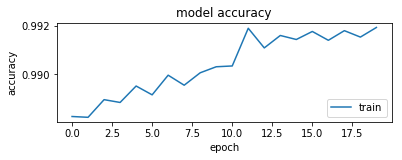

In [97]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


In [133]:
def predict_img(img):
    img = rgb2gray(img)
    img = (img.reshape(1,-1))
    Xhog = hog_features(img)
    Xhog = normalize(Xhog)
    Y = (model.predict(Xhog))
    return (np.argmax(Y))
    #hog_features(img.)

tx = io.imread("test4.tif")
predict_img(tx)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


0

In [134]:
filename = 'hognn_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
hog_model = load_model("model_name")
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])